# **云南大学软件学院 机器学习（实验-2）实验报告**

## **SVM与核方法**

**姓名：陈俊宏**

**学号：20211060245**

</br>

### **任务1：实现五个核函数，并通过函数图像分析核函数性质**

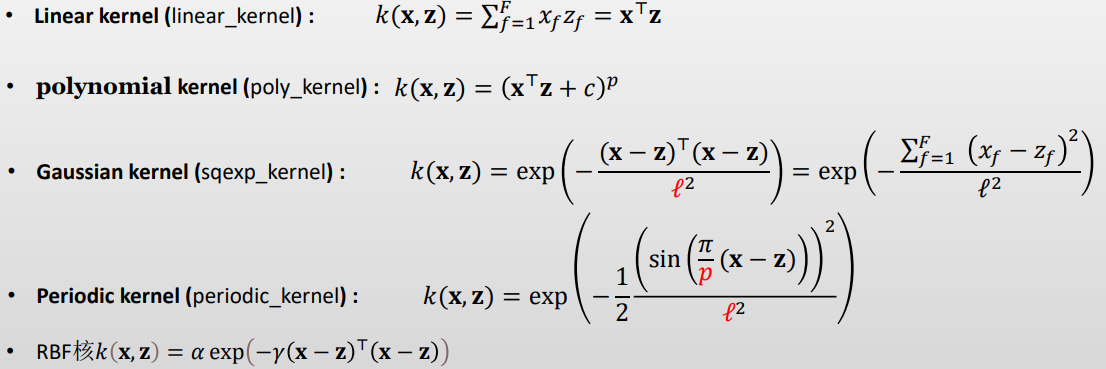

#### **任务1-1：基于python和numpy实现5个核函数（kernel function）**

#### **任务1-2：对于上述5个核函数，分别绘制出两个函数: 𝑘(𝑥, 1)， 𝑘(𝑥, 0)的图像**

#### **任务1-3：对于poly_kernel, GK,PeriodicK，RBF核，通过绘制不同超参数的𝑘(𝑥, 1)， 𝑘(𝑥, 0) （ 𝑥 ∈ −6,6 ）的图像，并分析超参数𝓁， 𝑝，𝛼，𝛾对于上述核函数的影响，得出具体结论。**

</br>

#### **KernelFunc.py**

　　在五个核函数的实现过程中，遇到了数组数据结构的问题，因为没有考虑到ndarray数组形状的问题，所以在验证核函数功能的过程中始终会出现关于ndarray.shape的报错，在认真查看了实验PPT详细说明，并回溯SVM课程PPT后，实现了核函数的功能。  
　　而后在绘制核函数的过程中，相同的错误又在matplotlib中报错，在对ndarray进行reshape操作后，最终得到了核函数图像。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 定义五个kernelFunction
class KernelFunction:
    def __init__(self, x: np.array, z: np.array) -> None:
        if len(np.array(x).shape) == 1:
            # 转为二维数组，n_features × n_samples
            self.x = np.array(x).reshape(1, len(x))
            self.z = np.array(z).reshape(1, len(z))
        else:
            # 若为二维，则不进行处理，形状为 n_features × n_samples
            self.x = np.array(x)
            self.z = np.array(z)

    def linear_kernel(self):
        # 返回线性核函数运行的结果
        return self.x.T.dot(self.z)

    def poly_kernel(self, c, p):
        # 返回多项式核函数运行的结果
        return ((self.x.T.dot(self.z)) + c) ** p

    def gaussian_kernel(self, l):
        # 返回高斯核函数运行的结果
        return np.exp(
            -(
                    ((self.x - self.z) ** 2)
                    / l ** 2
            )
        ).reshape([self.x.shape[1]])

    def periodic_kernel(self, p, l):
        # 返回periodic_kernel核函数运行的结果
        return np.exp(
            -0.5 * (np.sin((np.pi / p) * (self.x - self.z))) ** 2
            / l ** 2
        ).reshape([self.x.shape[1]])

    def RBF(self, alpha, gamma):
        # 返回periodic_kernel核函数运行的结果
        return alpha * np.exp(-gamma * (self.x - self.z) ** 2).reshape([self.x.shape[1]])


if __name__ == "__main__":
    x = np.linspace(-6, 6, num=256).tolist()
    # x_2dim = x.reshape((1, x.shape[0]))
    z_zero = [0.0]
    z_one = [1.0]
    # 创建核函数实例，输入数据必须为二维数组
    Kernel_x0 = KernelFunction(x, z_zero)
    Kernel_x1 = KernelFunction(x, z_one)

    # fig画布；axes子图区域
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    fig.suptitle("Kernel Function", fontsize=25, fontweight="bold")
    # 限定坐标轴范围
    axes[0][0].set(title="k(x, 0)    linear_kernel", xlim=(-6, 6))
    axes[0][1].set(title="k(x, 0)    poly_kernel", xlim=(-6, 6))
    axes[0][2].set(title="k(x, 0)    gaussian_kernel", xlim=(-6, 6))
    axes[0][3].set(title="k(x, 0)    RBF_kernel", xlim=(-6, 6))
    axes[0][4].set(title="k(x, 0)    periodic_kernel", xlim=(-6, 6))
    axes[1][0].set(title="k(x, 1)    linear_kernel", xlim=(-6, 6))
    axes[1][1].set(title="k(x, 1)    poly_kernel", xlim=(-6, 6))
    axes[1][2].set(title="k(x, 1)    gaussian_kernel", xlim=(-6, 6))
    axes[1][3].set(title="k(x, 1)    RBF_kernel", xlim=(-6, 6))
    axes[1][4].set(title="k(x, 1)    periodic_kernel", xlim=(-6, 6))

    # 绘制linear_kernel图像
    axes[0][0].plot(x, Kernel_x0.linear_kernel())
    axes[1][0].plot(x, Kernel_x1.linear_kernel())

    # 绘制poly_kernel图像，改变c使函数图像发生偏移，改变p则会改变函数的增长速度
    axes[0][1].plot(x, Kernel_x0.poly_kernel(1, 4))
    axes[1][1].plot(x, Kernel_x1.poly_kernel(1, 4))

    # 绘制gaussian_kernel图像，改变l会改变分布的宽度
    axes[0][2].plot(x, Kernel_x0.gaussian_kernel(0.5))
    axes[1][2].plot(x, Kernel_x1.gaussian_kernel(0.5))

    # 绘制RBF_kernel图像，改变α会改变分布的峰值，改变γ会改变分布的宽度
    axes[0][3].plot(x, Kernel_x0.RBF(1, 0.5))
    axes[1][3].plot(x, Kernel_x1.RBF(1, 0.5))

    # 绘制periodic_kernel图像，改变p会改变周期的长度，改变l会改变对称轴的位置
    axes[0][4].plot(x, Kernel_x0.periodic_kernel(1, 1))
    axes[1][4].plot(x, Kernel_x1.periodic_kernel(1, 1))

    # 保存图像
    plt.savefig("./KernelFunction.png")

    # 展示图像
    plt.show()


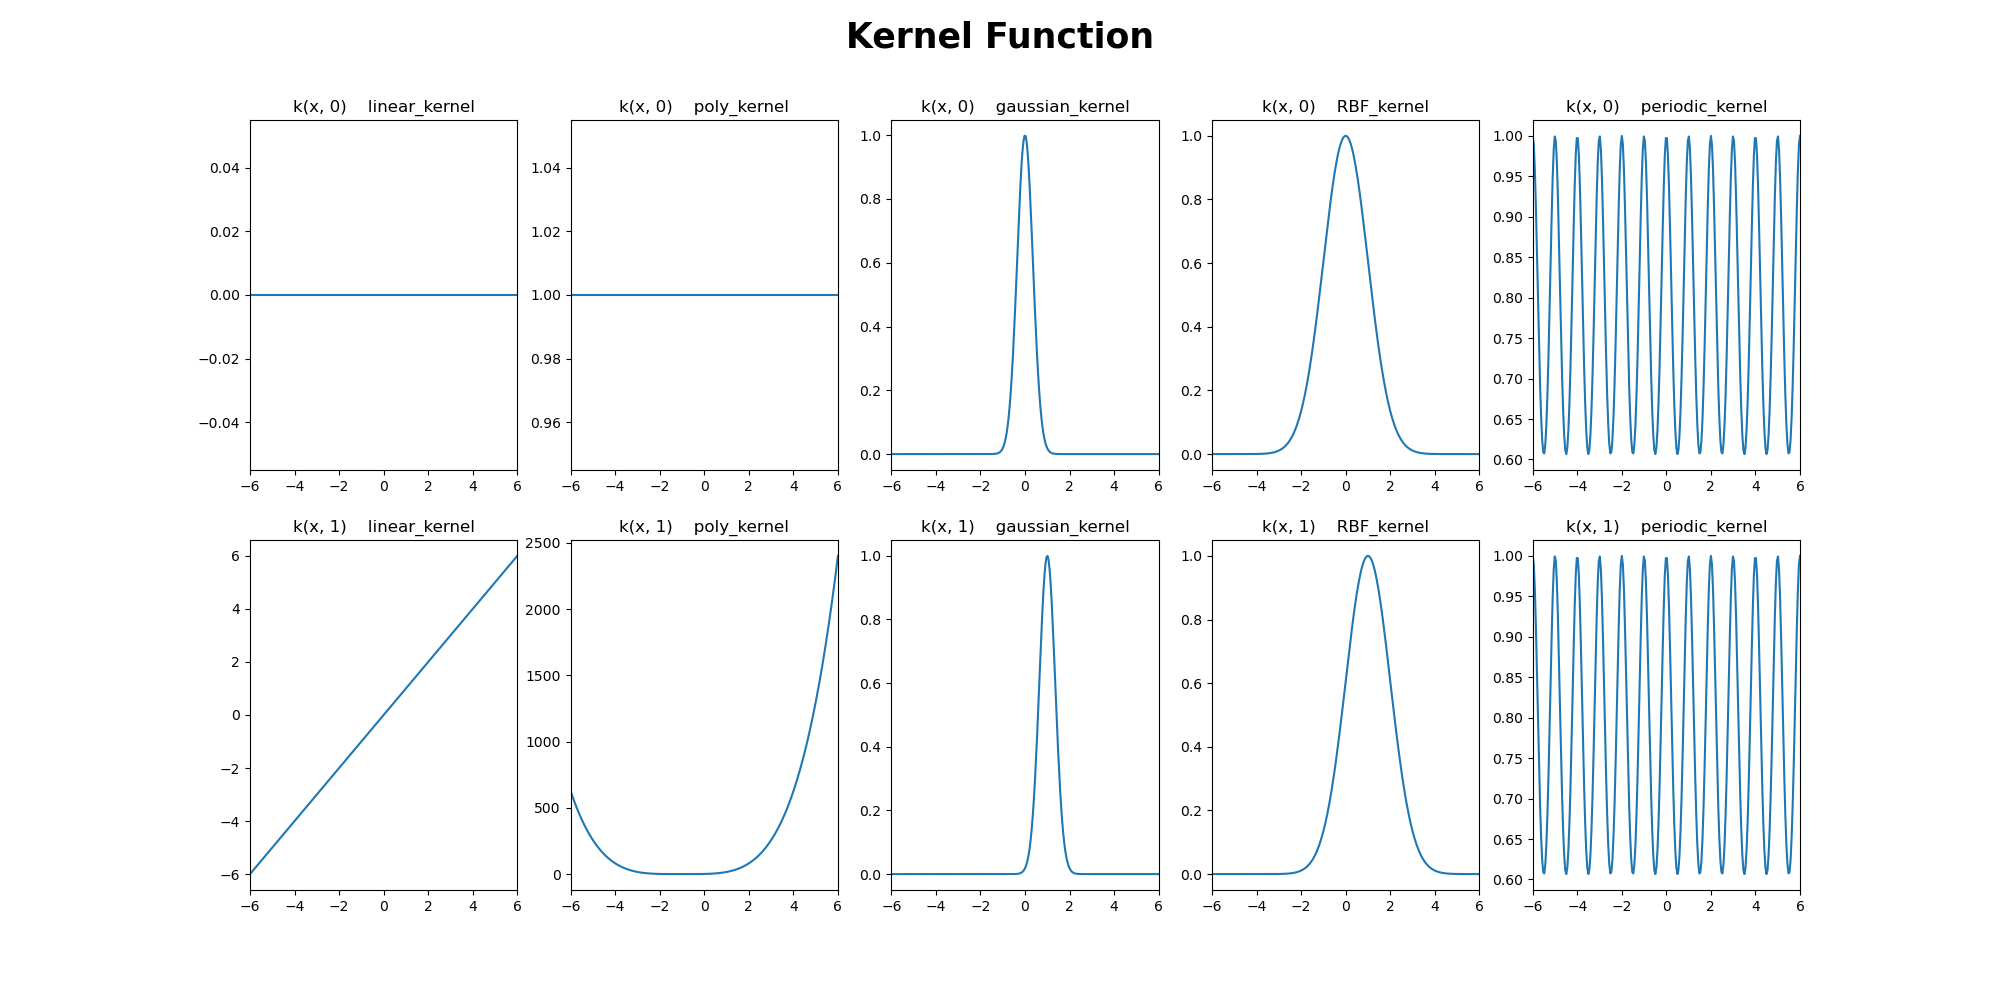

如代码中注释所提及，分别改变不同核函数的超参数：  
* 绘制poly_kernel图像，改变c使函数图像发生偏移，改变p则会改变函数的增长速度
* 绘制gaussian_kernel图像，改变l会改变分布的宽度
* 绘制RBF_kernel图像，改变α会改变分布的峰值，改变γ会改变分布的宽度
* 绘制periodic_kernel图像，改变p会改变周期的长度，改变l会改变对称轴的位置

</br>

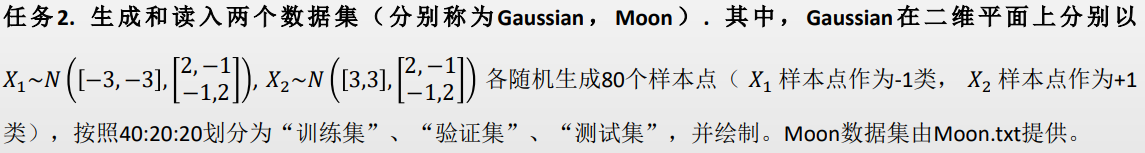

　　由于未能找到Moon.txt，所以Gaussian和Moon数据集都由我生成，分为 `GetGaussian.py` 和 `GetMoons.py` 两个文件，用于生成数据集，并保存于 `Gaussian.json` 和 `two_moons.json` 两个json文件中。

#### **GetGaussian.py**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json

# 定义均值和协方差矩阵
mean1 = [-3, -3]
cov1 = [[2, -1], [-1, 2]]
mean2 = [3, 3]
cov2 = [[2, -1], [-1, 2]]

# 生成80个样本点
sample1 = np.random.multivariate_normal(mean1, cov1, 80)
sample2 = np.random.multivariate_normal(mean2, cov2, 80)
# 将生成的数据装入字典，且[0]表示x，[1]表示y
samples = {
    "train": {"negative": [sample1[:int(len(sample1) * 0.5), 0], sample1[:int(len(sample1) * 0.5), 1]],
              "positive": [sample2[:int(len(sample2) * 0.5), 0], sample2[:int(len(sample2) * 0.5), 1]]},
    "validation": {"negative": [sample1[int(len(sample1) * 0.5):int(len(sample1) * 0.75), 0],
                                sample1[int(len(sample1) * 0.5):int(len(sample1) * 0.75), 1]],
                   "positive": [sample2[int(len(sample2) * 0.5):int(len(sample2) * 0.75), 0],
                                sample2[int(len(sample2) * 0.5):int(len(sample2) * 0.75), 1]]},
    "test": {"negative": [sample1[int(len(sample1) * 0.75):, 0], sample1[int(len(sample1) * 0.75):, 1]],
             "positive": [sample2[int(len(sample2) * 0.75):, 0], sample2[int(len(sample2) * 0.75):, 1]]}
}
for key1, value1 in samples.items():
    for key2, value2 in value1.items():
        for i in range(len(value2)):
            if isinstance(value2[i], np.ndarray):
                value2[i] = value2[i].tolist()
with open("./Gaussian.json", "w", encoding="utf-8") as fp:
    json.dump(samples, fp, indent=4)

# fig画布；axes子图区域
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Gaussian Samples", fontsize=25, fontweight="bold")

axes[0].set(title='Train', ylim=(-10, 10), xlim=(-10, 10))
axes[1].set(title='Validation', ylim=(-10, 10), xlim=(-10, 10))
axes[2].set(title='Test', ylim=(-10, 10), xlim=(-10, 10))

# 绘制散点图
axes[0].scatter(samples["train"]["negative"][0], samples["train"]["negative"][1], color="blue", label="negative")
axes[0].scatter(samples["train"]["positive"][0], samples["train"]["positive"][1], color="orange", label="positive")
axes[1].scatter(samples["validation"]["negative"][0], samples["validation"]["negative"][1], color="blue",
                label="negative")
axes[1].scatter(samples["validation"]["positive"][0], samples["validation"]["positive"][1], color="orange",
                label="positive")
axes[2].scatter(samples["test"]["negative"][0], samples["test"]["negative"][1], color="blue", label="negative")
axes[2].scatter(samples["test"]["positive"][0], samples["test"]["positive"][1], color="orange", label="positive")

# 添加网格线
axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)

# 绘制图例
axes[0].legend(loc='upper left', fontsize='x-large')
axes[1].legend(loc='upper left', fontsize='x-large')
axes[2].legend(loc='upper left', fontsize='x-large')

# 保存图像
plt.savefig("./GaussianSamples.png")

# 显示图形
plt.show()


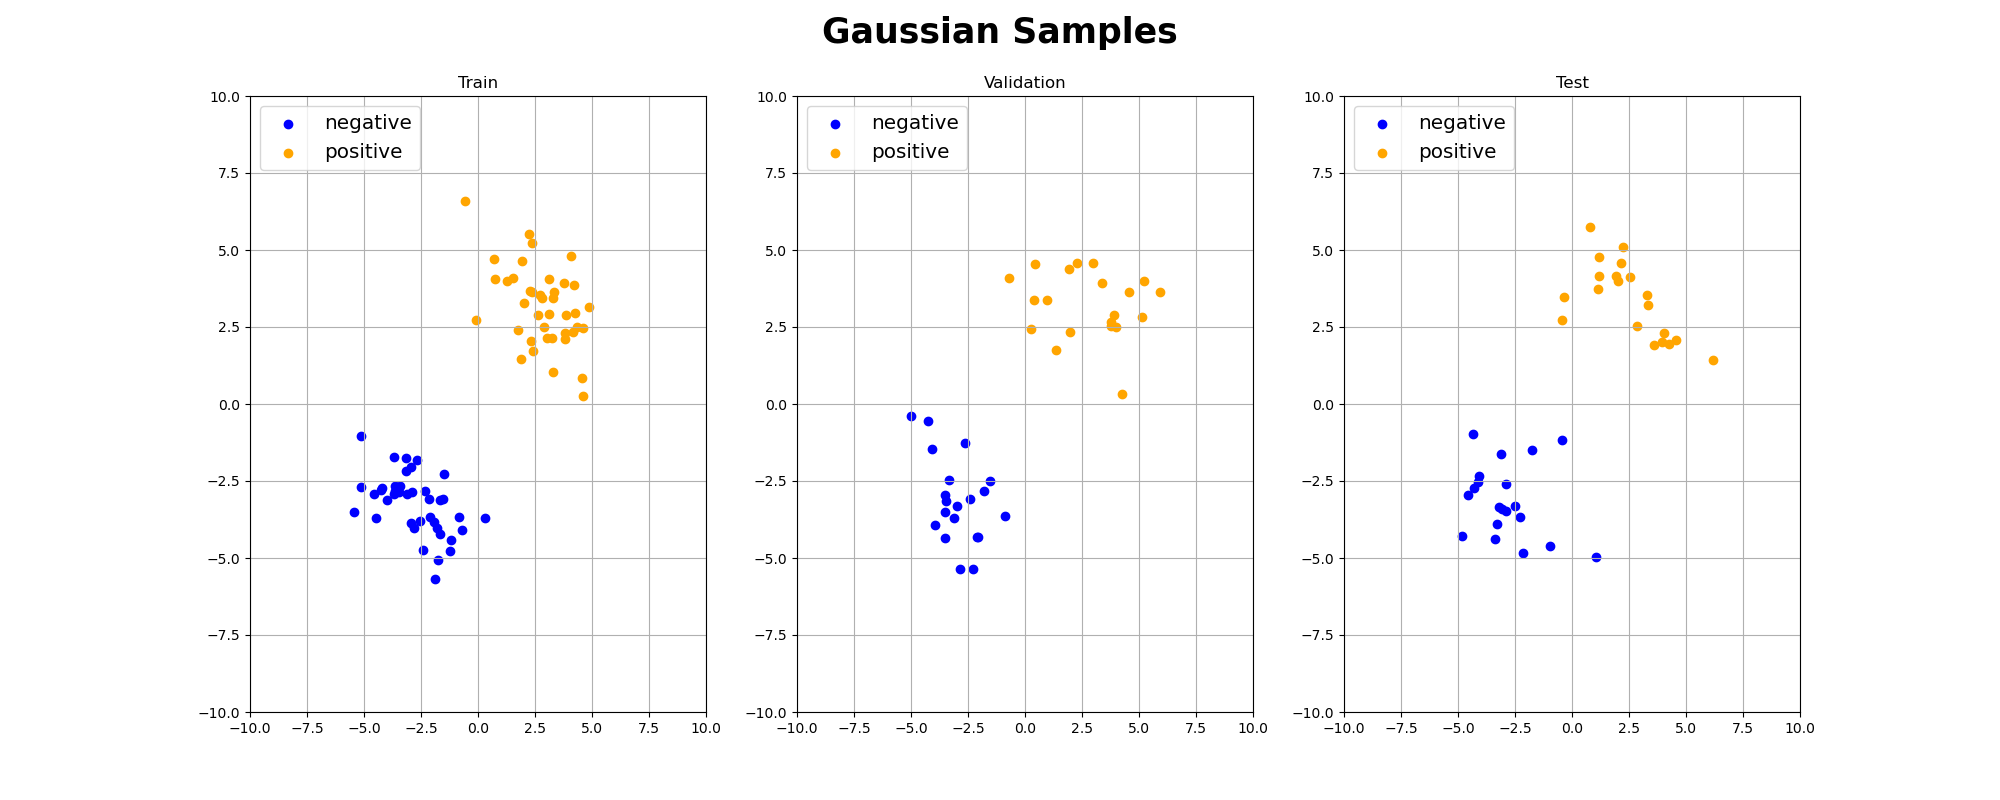

#### **GetMoons.py**

In [ ]:
import json

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import SVM

# 生成两个月牙形状的数据集，每个月亮分为一类
n_samples = 200
random_seed = 108
X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=random_seed)
y = 2 * y - 1  # 将标签转换为 -1 和 +1

sorted_indices = np.argsort(y)
y_sorted = y[sorted_indices]
X_sorted = X[sorted_indices]

# 划分数据集为训练集、验证集和测试集
X_train_pos, X_temp_pos, y_train_pos, y_temp_pos = train_test_split(X_sorted[:int(n_samples / 2), :],
                                                                    y_sorted[:int(n_samples / 2)], test_size=0.5,
                                                                    random_state=random_seed)
X_val_pos, X_test_pos, y_val_pos, y_test_pos = train_test_split(X_temp_pos, y_temp_pos, test_size=0.5, random_state=random_seed)
X_train_neg, X_temp_neg, y_train_neg, y_temp_neg = train_test_split(X_sorted[int(n_samples / 2):int(n_samples), :],
                                                                    y_sorted[int(n_samples / 2):int(n_samples)],
                                                                    test_size=0.5, random_state=random_seed)
X_val_neg, X_test_neg, y_val_neg, y_test_neg = train_test_split(X_temp_neg, y_temp_neg, test_size=0.5, random_state=random_seed)

X_train = np.fliplr(np.vstack([X_train_pos, X_train_neg]))
y_train = np.hstack([y_train_pos, y_train_neg])
X_val = np.fliplr(np.vstack([X_val_pos, X_val_neg]))
y_val = np.hstack([y_val_pos, y_val_neg])
X_test = np.fliplr(np.vstack([X_test_pos, X_test_neg]))
y_test = np.hstack([y_test_pos, y_test_neg])
two_moons = {
    "train": {
        "negative": [X_train[:int(X_train.shape[0] / 2)], y_train[:int(y_train.shape[0] / 2)]],
        "positive": [X_train[int(X_train.shape[0] / 2):int(X_train.shape[0])],
                     y_train[int(y_train.shape[0] / 2):int(y_train.shape[0])]]
    },
    "validation": {
        "negative": [X_val[:int(X_val.shape[0] / 2)], y_train[:int(y_val.shape[0] / 2)]],
        "positive": [X_val[int(X_val.shape[0] / 2):int(X_val.shape[0])],
                     y_train[int(y_val.shape[0] / 2):int(y_val.shape[0])]],
    },
    "test": {
        "negative": [X_test[:int(X_test.shape[0] / 2)], y_train[:int(y_test.shape[0] / 2)]],
        "positive": [X_test[int(X_test.shape[0] / 2):int(X_test.shape[0])],
                     y_test[int(y_test.shape[0] / 2):int(y_test.shape[0])]],
    },
}
for key1, value1 in two_moons.items():
    for key2, value2 in value1.items():
        for i in range(len(value2)):
            if isinstance(value2[i], np.ndarray):
                value2[i] = value2[i].tolist()
with open("./two_moos.json", "w", encoding="utf-8") as fp:
    json.dump(two_moons, fp, indent=4)

# 绘制训练集、验证集和测试集的数据点
plt.scatter(X_train[:, 0], X_train[:, 1], label='Train')
plt.scatter(X_val[:, 0], X_val[:, 1], label='Validation')
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Moons Dataset')
plt.legend()
plt.savefig("./TwoMoons.png")
plt.show()


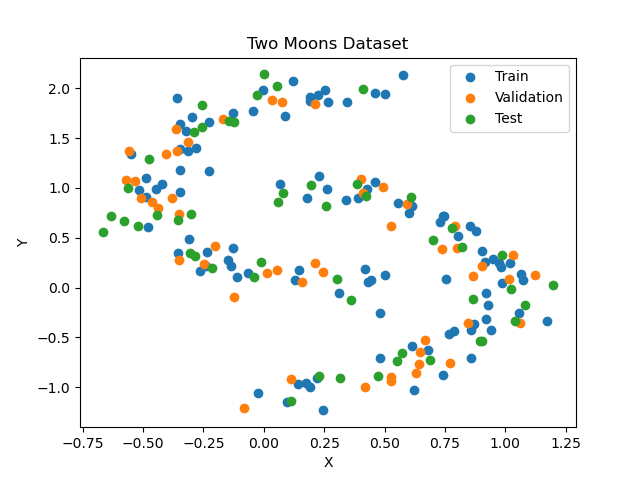

</br>

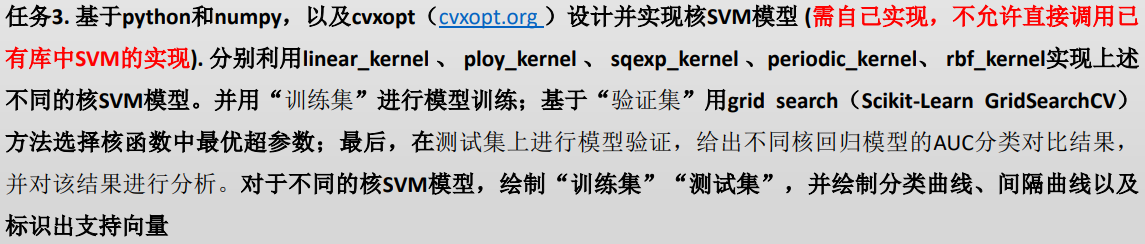

　　在本任务中，由于本人对 **`matplotlib`** 的不熟悉，不知道类似分类的图像需要以 **`等高线图`** 的形式绘画，同时也对 **`SVM`** 结合 **`Kernel_Trick`** 的过程不够明了，导致我频繁实验了一星期之后，仍然未能正确运行整个实验代码，最终只实现了 **`linear_kernel`** 的图像，且在运用其它 **`核函数`** 时，会出现仍是直线的现象，初步判断是当时不知道需要用 **`等高线`** 绘画的结果，于是在周日进行一天的实验仍未运行出结果后，我放弃了本人所写的代码，参考了别人的代码并进行了修改，以下是所有代码内容。

#### **test.py(本人实验代码)**

In [ ]:
###############################################################################################
##################################本代码为弃用代码###############################################
###############################################################################################
import json

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import test2_1_KernelFunc
from cvxopt import matrix, solvers


# # 生成"two_moons"数据集
# X, y = make_moons(n_samples=160, noise=0.1, random_state=42)
#
# # 绘制散点图
# plt.scatter(X[:, 1], X[:, 0], c=y, cmap=plt.cm.Set1, edgecolor='k')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Two Moons Dataset')
# plt.show()

def linear_kernel(x, z):
    # 返回线性核函数运行的结果
    return x.T.dot(z)


def poly_kernel(x, z, c, p):
    # 返回多项式核函数运行的结果
    return ((x.T.dot(z)) + c) ** p


def gaussian_kernel(x, z, l):
    # 返回高斯核函数运行的结果
    return np.exp(
        -(
                ((x - z) ** 2)
                / l ** 2
        )
    ).reshape([x.shape[1]])


def periodic_kernel(x, z, p, l):
    # 返回periodic_kernel核函数运行的结果
    return np.exp(
        -0.5 * (np.sin((np.pi / p) * (x - z))) ** 2
        / l ** 2
    ).reshape([x.shape[1]])


def RBF(x, z, alpha, gamma):
    # 返回periodic_kernel核函数运行的结果
    return alpha * np.exp(-gamma * (x - z) ** 2).reshape([x.shape[1]])


with open("./Gaussian.json", "r", encoding="utf-8") as fp:
    data = json.load(fp)
    train = np.hstack((np.array(data["train"]["negative"]), np.array(data["train"]["positive"]))).T
    P = []
    for i in range(len(train)):
        temp = []
        yi = -1 if i < int(len(train) / 2) else 1
        for j in range(len(train)):
            yj = -1 if j < int(len(train) / 2) else 1
            temp.append(yi * yj * (gaussian_kernel(train[i].reshape(2, 1), train[j].reshape(2, 1), 3)[0, 0]))
        P.append(temp)
    P = matrix(np.array(P))
    q = matrix(np.ones(train.shape[0]))
    G = matrix(np.diag(-np.ones(train.shape[0]), k=0))
    h = matrix(np.zeros(train.shape[0]))
    A = matrix(np.hstack((-np.ones(int(train.shape[0] / 2)), np.ones(int(train.shape[0] / 2)))), (1, train.shape[0]))
    b = matrix(np.array([[0.0]]))

    # 使用CVXOPT库求解优化问题
    solution = solvers.qp(P, q, G, h, A, b)
    alpha = np.array(solution['x']).flatten()

    # 提取支持向量和对应的标签
    sv_indices = np.where(alpha > 1e-9)[0]
    support_vectors = [list(train[i]) for i in sv_indices]
    support_vector_labels = [(list(A))[i] for i in sv_indices]
    GLM = [list(alpha)[i] for i in sv_indices]
    w = ((np.array(GLM).reshape(1, 2) * support_vector_labels).dot(support_vectors))
    bias = np.array(support_vector_labels) - (np.array(GLM).reshape(1, 2) * support_vector_labels).dot(
        gaussian_kernel(np.array(support_vectors)[0].T, np.array(support_vectors)[1], 3))
    print("w:")
    print(w)
    print("bias:")
    print(bias)

    fig = plt.figure(figsize=(20, 15))
    x_temp = (np.linspace(-10, 10, num=10).flatten())
    y_temp = (-(w[0][0] * gaussian_kernel(x_temp)) / w[0][1]).flatten()
    print(x_temp)
    print(y_temp)

    plt.plot(x_temp, y_temp, color="blue")
    plt.plot(x_temp, y_temp - 1, color="blue")
    plt.plot(x_temp, y_temp + 1, color="blue")
    plt.scatter(train.T[0], train.T[1])
    plt.title('Test')
    plt.show()
###############################################################################################
##################################本代码为弃用代码###############################################
###############################################################################################

#### **SVM_Gaussian.py**

　　在参考别人的代码的基础上修改而来，源代码地址为：[https://github.com/bobbyrathoree/Soft-Margin-SVM-with-CVXOPT](https://github.com/bobbyrathoree/Soft-Margin-SVM-with-CVXOPT)

In [ ]:
import json

import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt

# 尝试进行GridSearchCV调参，但在修改过程中遇到诸多问题，且本身识别效果已经达到100%，遂放弃
param = {
    "Polynomial Kernel": {
        "c": [0.01, 0.1, 1, 10, 100],
        "p": [0.01, 0.1, 1, 3, 5, 7, 9, 20, 50, 100]
    },
    "Gaussian Kernel": {
        "l": [0.01, 0.1, 1, 3, 5, 7, 9, 10, 20, 50, 100]
    },
    "RBF Kernel": {
        "alpha": [0.01, 0.1, 1, 2, 4, 6, 8, 10, 20, 40, 80, 100],
        "gamma": [0.01, 0.1, 0.5, 0.8, 1, 2, 4, 6, 8, 10, 20, 40, 80, 100]
    },
    "Periodic Kernel": {
        "p": [0.01, 0.1, 1, 5, 10, 15, 20, 40, 60, 80, 100],
        "l": [0.01, 0.1, 1, 5, 10, 40, 80, 100]
    }
}

# 核函数
def linear_kernel(x1, x2):
    return np.dot(x1, x2)


def polynomial_kernel(x, y, c=1, p=2):
    return (c + np.dot(x, y)) ** p


def gaussian_kernel(x, y, l=5.0):
    return np.exp(-linalg.norm(x - y) ** 2 / l ** 2)


def RBF(x, y, alpha=4, gamma=0.2):
    return alpha * np.exp(-gamma * linalg.norm(x - y) ** 2)


def periodic_kernel(x, y, p=15.0, l=1.0):
    return np.exp(
        -0.5 * (np.sin((np.pi / p) * linalg.norm(x - y))) ** 2
        / l ** 2
    )


# 定义自定义评分函数
def accuracy_score(y_true, y_pred):
    correct = np.sum(y_pred == y_true)
    accuracy = correct / len(y_pred)
    return round(accuracy, 4)


class SVM(object):

    def __init__(self, kernel=linear_kernel):
        # 定义模型核函数
        self.kernel = kernel

    def fit(self, X, y):
        # 获取数据集样本数和特征数
        # n_samples × n_features
        n_samples, n_features = X.shape

        # 得到核矩阵
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])
        # 计算P, q, A, b, G, h
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples))
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        h = cvxopt.matrix(np.zeros(n_samples))

        # 用cvxopt解决二次规划问题
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # 获得拉格朗日乘子
        a = np.ravel(solution['x'])

        # 由于为浮点计算，精度导致拉格朗日乘子不为0，所以规定支持向量的拉格朗日乘子需要大于1e-5
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        print('{0} support vectors out of {1} points'.format(len(self.a), n_samples))

        # 计算bias
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)

        # 计算w权重向量
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
    
    # 通过给定的X向量，计算模型预测值
    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
        return y_predict + self.b

    # 预测函数，返回Bool值
    def predict(self, X):
        return np.sign(self.project(X))


def plot_contour(axes_i: int, axes_j: int, kernel_name: str, X1_train, X2_train, X1_test, X2_test, clf):
    # 等高线绘制函数
    X1, X2 = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = clf.project(X).reshape(X1.shape)

    axes[axes_i][axes_j].plot(X1_train[:, 0], X1_train[:, 1], "ro", label="Train Set Class 1")
    axes[axes_i][axes_j].plot(X2_train[:, 0], X2_train[:, 1], "bo", label="Train Set Class -1")
    axes[axes_i][axes_j].scatter(X1_test[:, 0], X1_test[:, 1], marker="o", color="brown", label="Test Set Class 1")
    axes[axes_i][axes_j].scatter(X2_test[:, 0], X2_test[:, 1], marker="o", color="#48d1cc",
                                 label="Test Set Class -1")

    contour = axes[axes_i][axes_j].contourf(X1, X2, Z, [0.0], levels=14, linestyles="", alpha=.50, cmap="bwr")
    plt.colorbar(contour, ax=axes[axes_i][axes_j])

    axes[axes_i][axes_j].contour(X1, X2, Z, [0.0], colors='YELLOW', linewidths=1, origin='lower')
    axes[axes_i][axes_j].contour(X1, X2, Z + 1, [0.0], colors='BLUE', linestyles="dotted", linewidths=1,
                                 origin='lower')
    axes[axes_i][axes_j].contour(X1, X2, Z - 1, [0.0], colors='RED', linestyles="dotted", linewidths=1,
                                 origin='lower')

    axes[axes_i][axes_j].scatter(clf.sv[:, 0], clf.sv[:, 1], marker="o", s=70, facecolors='none',
                                 edgecolors="YELLOW", linewidths=2.5, label="Support Vector")
    axes[axes_i][axes_j].set(title=kernel_name)
    axes[axes_i][axes_j].legend(loc="upper center", fontsize='xx-small', ncol=2)

    axes[axes_i][axes_j].axis("tight")


def train(axes_i: int, axes_j: int, kernel, kernel_name: str):
    # 训练函数，最终在主函数中调用的函数
    clf = SVM(kernel)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy[kernel_name] = accuracy_score(y_predict, y_test)
    print(f"准确率为:{accuracy[kernel_name] * 100}%")
    plot_contour(axes_i, axes_j, kernel_name, X_train[y_train == 1], X_train[y_train == -1], X_test[y_test == 1],
                 X_test[y_test == -1], clf)


if __name__ == "__main__":
    # 创建画布
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    
    # 定义accuracy字典，用于存储分类准确率
    accuracy = {
        "Linear Kernel": None,
        "Polynomial Kernel": None,
        "Gaussian Kernel": None,
        "RBF Kernel": None,
        "Periodic Kernel": None
    }
    
    # 加载数据集
    with open("./Gaussian.json", "r", encoding="utf-8") as fp:
        data = json.load(fp)
        X_train = np.hstack((np.array(data["train"]["negative"]), np.array(data["train"]["positive"]))).T
        y_train = np.hstack((-np.ones(int(X_train.shape[0] / 2)), np.ones(int(X_train.shape[0] / 2))))
        X_val = np.hstack((np.array(data["validation"]["negative"]), np.array(data["validation"]["positive"]))).T
        y_val = np.hstack((-np.ones(int(X_val.shape[0] / 2)), np.ones(int(X_val.shape[0] / 2))))
        X_test = np.hstack((np.array(data["test"]["negative"]), np.array(data["test"]["positive"]))).T
        y_test = np.hstack((-np.ones(int(X_test.shape[0] / 2)), np.ones(int(X_test.shape[0] / 2))))

    # 定义图片标题
    fig.suptitle("Dual SVM for Gaussian dataset(Easy Dataset). For simplify, we don`t draw the validation set.",
                 fontsize=15)

    # 训练
    train(0, 0, linear_kernel, "Linear Kernel")
    train(0, 1, polynomial_kernel, "Polynomial Kernel")
    train(0, 2, gaussian_kernel, "Gaussian Kernel")
    train(1, 0, RBF, "RBF Kernel")
    train(1, 1, periodic_kernel, "Periodic Kernel")

    # 绘制准确率图
    axes[1][2].bar([label.replace(' ', '\n') for label in accuracy.keys()], accuracy.values())
    for label, value in zip([label.replace(' ', '\n') for label in accuracy.keys()], accuracy.values()):
        axes[1][2].text(label, value, f"{value*100}%", ha='center', va='bottom')
    axes[1][2].tick_params(axis='x', labelsize=7.5)
    axes[1][2].set(title="Compare AUC of Different Kernels")

    # 保存图片
    plt.savefig("./GaussianCategory.png")

    # 展示图片
    plt.show()


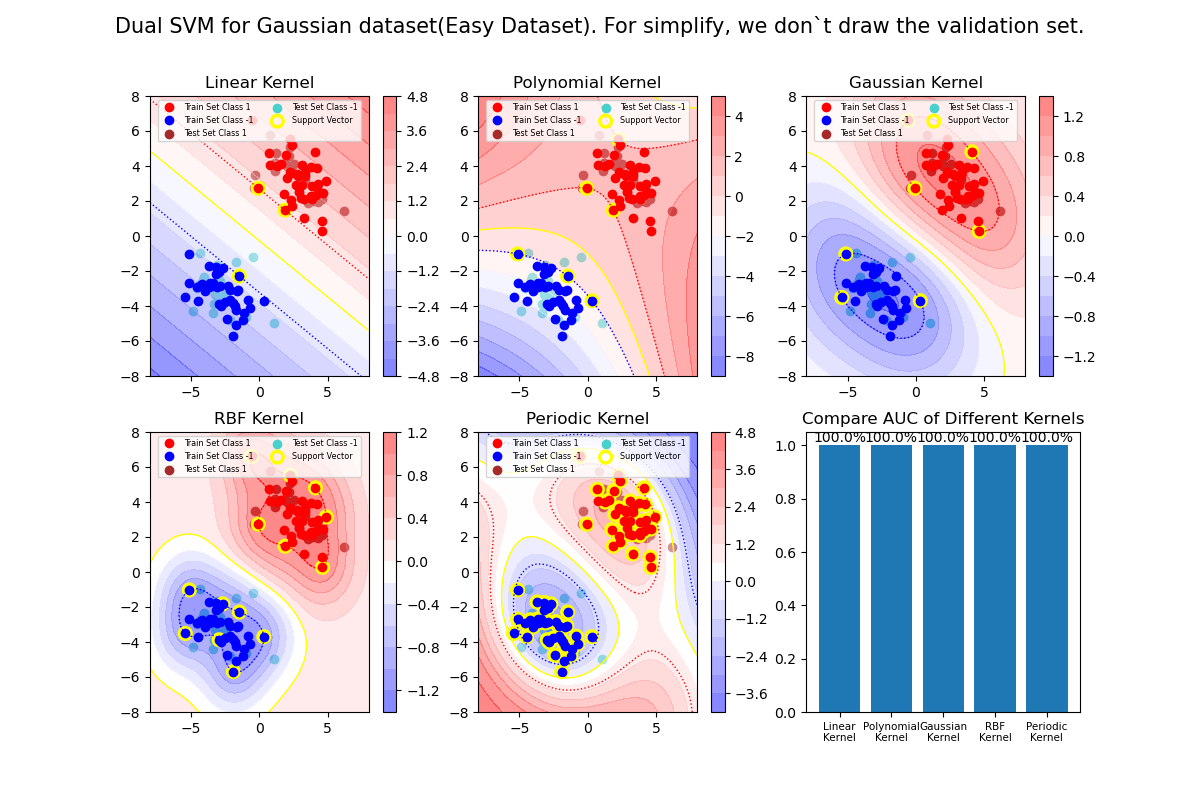

#### **SVM_Moons.py**

　　尝试过将 **`SVM`** 封装，但是由于在一开始的修改过程中没有考虑复用问题，所以定义的函数存在 **`耦合问题`** ，最终未能复用，采取了重新定义文件的笨方法，源代码地址：[https://github.com/bobbyrathoree/Soft-Margin-SVM-with-CVXOPT](https://github.com/bobbyrathoree/Soft-Margin-SVM-with-CVXOPT)

In [ ]:
import json

import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt

# 尝试进行GridSearchCV调参，但在修改过程中遇到诸多问题，且本身识别效果已经达到100%，遂放弃
param = {
    "Polynomial Kernel": {
        "c": [0.01, 0.1, 1, 10, 100],
        "p": [0.01, 0.1, 1, 3, 5, 7, 9, 20, 50, 100]
    },
    "Gaussian Kernel": {
        "l": [0.01, 0.1, 1, 3, 5, 7, 9, 10, 20, 50, 100]
    },
    "RBF Kernel": {
        "alpha": [0.01, 0.1, 1, 2, 4, 6, 8, 10, 20, 40, 80, 100],
        "gamma": [0.01, 0.1, 0.5, 0.8, 1, 2, 4, 6, 8, 10, 20, 40, 80, 100]
    },
    "Periodic Kernel": {
        "p": [0.01, 0.1, 1, 5, 10, 15, 20, 40, 60, 80, 100],
        "l": [0.01, 0.1, 1, 5, 10, 40, 80, 100]
    }
}

# 核函数
def linear_kernel(x1, x2):
    return np.dot(x1, x2)


def polynomial_kernel(x, y, c=1, p=2):
    return (c + np.dot(x, y)) ** p


def gaussian_kernel(x, y, l=5.0):
    return np.exp(-linalg.norm(x - y) ** 2 / l ** 2)


def RBF(x, y, alpha=4, gamma=0.2):
    return alpha * np.exp(-gamma * linalg.norm(x - y) ** 2)


def periodic_kernel(x, y, p=15.0, l=1.0):
    return np.exp(
        -0.5 * (np.sin((np.pi / p) * linalg.norm(x - y))) ** 2
        / l ** 2
    )


# 定义自定义评分函数
def accuracy_score(y_true, y_pred):
    correct = np.sum(y_pred == y_true)
    accuracy = correct / len(y_pred)
    return round(accuracy, 4)


class SVM(object):

    def __init__(self, kernel=linear_kernel):
        # 定义模型核函数
        self.kernel = kernel

    def fit(self, X, y):
        # 获取数据集样本数和特征数
        # n_samples × n_features
        n_samples, n_features = X.shape

        # 得到核矩阵
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])
        # 计算P, q, A, b, G, h
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples))
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        h = cvxopt.matrix(np.zeros(n_samples))

        # 用cvxopt解决二次规划问题
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # 获得拉格朗日乘子
        a = np.ravel(solution['x'])

        # 由于为浮点计算，精度导致拉格朗日乘子不为0，所以规定支持向量的拉格朗日乘子需要大于1e-5
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        print('{0} support vectors out of {1} points'.format(len(self.a), n_samples))

        # 计算bias
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)

        # 计算w权重向量
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
    
    # 通过给定的X向量，计算模型预测值
    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
        return y_predict + self.b

    # 预测函数，返回Bool值
    def predict(self, X):
        return np.sign(self.project(X))


def plot_contour(axes_i: int, axes_j: int, kernel_name: str, X1_train, X2_train, X1_test, X2_test, clf):
    # 等高线绘制函数
    X1, X2 = np.meshgrid(np.linspace(-1, 1.5, 50), np.linspace(-1.5, 2.5, 50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = clf.project(X).reshape(X1.shape)

    axes[axes_i][axes_j].plot(X1_train[:, 0], X1_train[:, 1], "ro", label="Train Set Class 1")
    axes[axes_i][axes_j].plot(X2_train[:, 0], X2_train[:, 1], "bo", label="Train Set Class -1")
    axes[axes_i][axes_j].scatter(X1_test[:, 0], X1_test[:, 1], marker="o", color="brown", label="Test Set Class 1")
    axes[axes_i][axes_j].scatter(X2_test[:, 0], X2_test[:, 1], marker="o", color="#48d1cc",
                                 label="Test Set Class -1")

    contour = axes[axes_i][axes_j].contourf(X1, X2, Z, [0.0], levels=14, linestyles="", alpha=.50, cmap="bwr")
    plt.colorbar(contour, ax=axes[axes_i][axes_j])

    axes[axes_i][axes_j].contour(X1, X2, Z, [0.0], colors='YELLOW', linewidths=1, origin='lower')
    axes[axes_i][axes_j].contour(X1, X2, Z + 1, [0.0], colors='BLUE', linestyles="dotted", linewidths=1,
                                 origin='lower')
    axes[axes_i][axes_j].contour(X1, X2, Z - 1, [0.0], colors='RED', linestyles="dotted", linewidths=1,
                                 origin='lower')

    axes[axes_i][axes_j].scatter(clf.sv[:, 0], clf.sv[:, 1], marker="o", s=70, facecolors='none',
                                 edgecolors="YELLOW", linewidths=2.5, label="Support Vector")
    axes[axes_i][axes_j].set(title=kernel_name)
    axes[axes_i][axes_j].legend(loc="upper center", fontsize='xx-small', ncol=2)

    axes[axes_i][axes_j].axis("tight")


def train(axes_i: int, axes_j: int, kernel, kernel_name: str):
    # 训练函数，最终在主函数中调用的函数
    clf = SVM(kernel)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy[kernel_name] = accuracy_score(y_predict, y_test)
    print(f"准确率为:{accuracy[kernel_name] * 100}%")
    plot_contour(axes_i, axes_j, kernel_name, X_train[y_train == 1], X_train[y_train == -1], X_test[y_test == 1],
                 X_test[y_test == -1], clf)


if __name__ == "__main__":
    # 创建画布
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # 定义accuracy字典，用于存储分类准确率
    accuracy = {
        "Linear Kernel": None,
        "Polynomial Kernel": None,
        "Gaussian Kernel": None,
        "RBF Kernel": None,
        "Periodic Kernel": None
    }

    # 加载数据集
    with open("./two_moos.json", "r", encoding="utf-8") as fp:
        data = json.load(fp)
        X_train = np.vstack((np.array(data["train"]["negative"][0]), np.array(data["train"]["positive"][0])))
        y_train = np.hstack((np.array(data["train"]["negative"][1]), np.array(data["train"]["positive"][1]))).astype(
            float)
        X_val = np.vstack((np.array(data["validation"]["negative"][0]), np.array(data["validation"]["positive"][0])))
        y_val = np.hstack(
            (np.array(data["validation"]["negative"][1]), np.array(data["validation"]["positive"][1]))).astype(float)
        X_test = np.vstack((np.array(data["test"]["negative"][0]), np.array(data["test"]["positive"][0])))
        y_test = np.hstack((np.array(data["test"]["negative"][1]), np.array(data["test"]["positive"][1]))).astype(float)

    # 定义图片标题
    fig.suptitle("Dual SVM for Moon dataset(Difficult Dataset). For simplify, we don`t draw the validation set.",
                 fontsize=15)

    # 训练
    train(0, 0, linear_kernel, "Linear Kernel")
    train(0, 1, polynomial_kernel, "Polynomial Kernel")
    train(0, 2, gaussian_kernel, "Gaussian Kernel")
    train(1, 0, RBF, "RBF Kernel")
    train(1, 1, periodic_kernel, "Periodic Kernel")

    # 绘制准确率图
    axes[1][2].bar([label.replace(' ', '\n') for label in accuracy.keys()], accuracy.values())
    for label, value in zip([label.replace(' ', '\n') for label in accuracy.keys()], accuracy.values()):
        axes[1][2].text(label, value, f"{value*100}%", ha='center', va='bottom')
    axes[1][2].tick_params(axis='x', labelsize=7.5)
    axes[1][2].set(title="Compare AUC of Different Kernels")

    # 保存图片
    plt.savefig("./MoonCategory.png")

    # 展示图片
    plt.show()


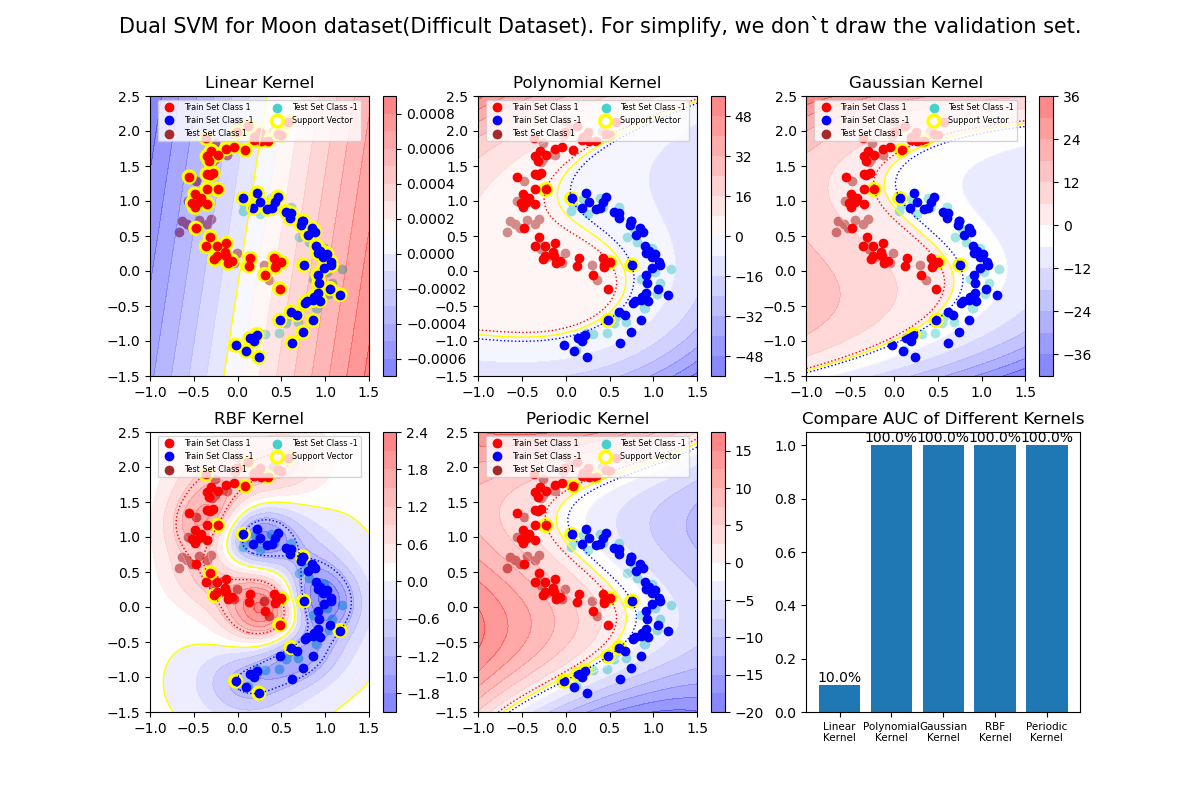

</br>

## **实验总结**

　　在本次实验中，我们实现了 `对偶SVM` 并在 `Gaussian` 和 `Moon` 两个数据集上实现了训练和分类，由于对 `numpy` 和 `matplotlib` 仍不熟悉，所以在实现的过程中出现了许多问题，特别是在 `用什么图绘制` 问题上，几乎耗费了我一星期的时间，同时在对数学公式的复现中，我发现了 `x - z` 在numpy中应该用 `np.linalg.norm(x - z)` 来计算两个向量之间的欧氏距离，才能正确实现 `SVM` ，归结原因还是本人对 `SVM` 模型的不熟悉。  
　　虽然本人当时对 `SVM` 的复现过程产生了疑惑，但是在我的实验过程中，已经找了许多的资料以及讲解来进一步明白 `SVM` 的原理，但在实验过程中依然遇到了无法克服的阻力，最终只能在别人的代码的基础上修改得到最终结果，也为免是一种遗憾。  
　　`SVM参考项目地址：`[https://github.com/bobbyrathoree/Soft-Margin-SVM-with-CVXOPT](https://github.com/bobbyrathoree/Soft-Margin-SVM-with-CVXOPT)